In [2]:
#Import Libraries
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
%matplotlib inline


In [3]:
#Cool plotting feature for upcoming graphs
plt.rcParams['figure.figsize'] = [20.0, 7.0]
plt.rcParams.update({'font.size': 22,})

sns.set_palette('viridis')
sns.set_style('white')
sns.set_context('talk', font_scale=0.8)

In [4]:
#Import / Read CSVs
whale_csv = Path("Resources/whale.csv")
whale_returns = pd.read_csv(whale_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

algo_csv = Path("Resources/algo.csv")
algo_returns = pd.read_csv(algo_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

sp500_csv = Path("Resources/sp500.csv")
sp500_returns = pd.read_csv(sp500_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)


In [5]:
#Cleaning up Whale data
whale_clean = whale_returns.dropna()
whale_clean.drop_duplicates()
whale_clean.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652


In [6]:
#Removed null values
whale_clean.isnull().sum()

#Yes!

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [7]:
#Cleaning Algo data

algo_clean = algo_returns.dropna()
algo_clean.drop_duplicates()
algo_clean.head()


,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761


In [8]:
#What is the shape of our cleaned data file?

algo_clean.shape

(1235, 2)

In [9]:
#Ensure null values were removed

algo_clean.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

In [10]:
#Preview into cleaned data

algo_clean.sample(5)


,Algo 1,Algo 2
Date,,
2015-11-19,-0.002795,-0.002849
2014-07-23,0.002153,0.000109
2019-01-17,-0.000851,0.004454
2016-12-06,0.003199,0.008314
2016-06-09,0.003760,-0.004898


In [11]:
#Read S&P 

sp500_returns.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [12]:
#Verifying Data Type

sp500_returns.dtypes

Close    object
dtype: object

In [13]:
#Changing variable type by removing '$' to fit rest of DF variables

sp500_returns["Close"] = sp500_returns["Close"].str.replace("$", "").astype("float")

#Use a random sample to check that DF is clean

sp500_returns.sample(5)

,Close
Date,
2014-05-20,1872.83
2018-08-24,2874.69
2014-05-14,1888.53
2018-05-10,2723.07
2017-08-21,2428.37


In [14]:
#Verifying data change type

sp500_returns.dtypes

#Yes! We 1100000 % changed the data type!

Close    float64
dtype: object

In [15]:
#adding Daily returns

sp500_daily = sp500_returns.pct_change()
sp500_daily.sort_index()
sp500_daily.sample(5)


,Close
Date,
2015-03-12,0.006112
2014-03-05,-0.001715
2013-12-31,0.008941
2018-10-04,0.005559
2015-09-25,0.026342


In [16]:
#Clean up SP500 data by removing duplicates and NAN values

sp500_daily = sp500_daily.dropna()
sp500_daily.drop_duplicates()
sp500_daily.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [17]:
#Rename Close column & display

sp500_daily = sp500_daily.rename(columns = {
    "Close" :"S&P 500"
})
sp500_daily.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [18]:
#Concat first 3 CSV files & show the new concatted file
combined_df = pd.concat([whale_clean, algo_clean, sp500_daily], axis = "columns", join = "inner")
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254


In [19]:
#####  PORFOLIO ANALYSIS 1 #####

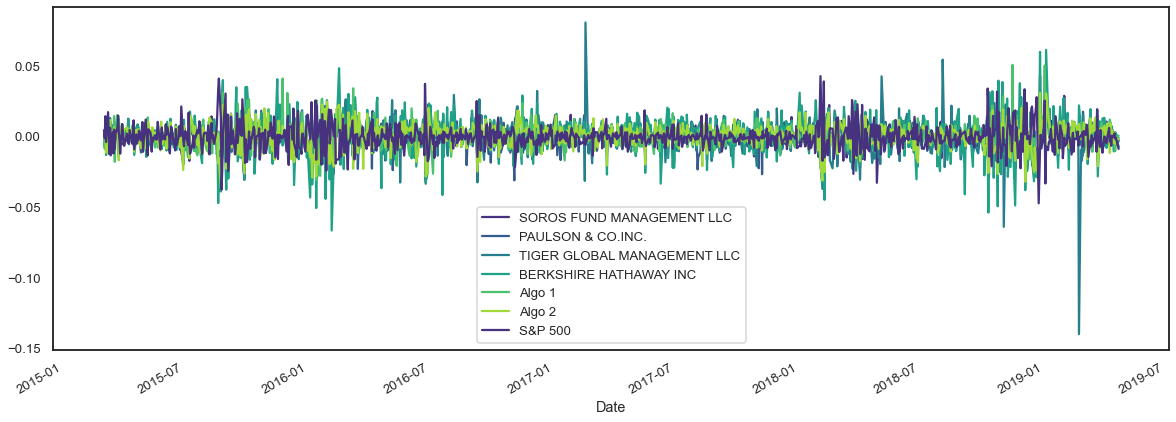

In [20]:
#Calculate and plot DAILY & cumulative returns.

combined_df.plot()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-15                   1.157839            0.786506   
2019-04-16                   1.160965            0.786811   
2019-04-17                   1.157602            0.781723   
2019-04-18                   1.159278            0.782678   
2019-04-22                   1.156280            0.776939   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-15                     0.862797                1.525584  1.958591   
2019-04-16                     0.862080                1.526861  1.944990   
2019-04-17                     0.858279                1.531781  1.924954   
2019-04-18                     0.858778                1.534716  1.923823   
2019-04-22                     0.855652                1.533046  1.925124   

              Algo 2   S&P 500  

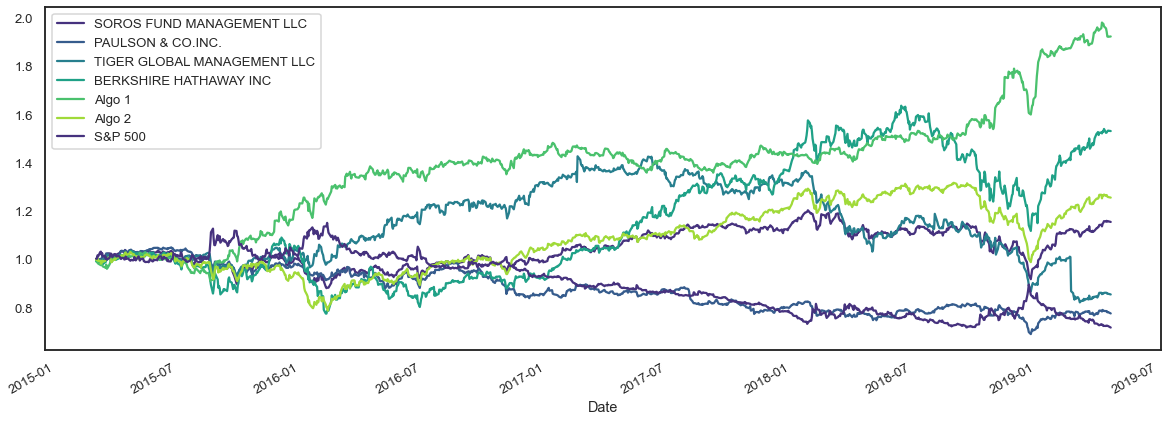

In [21]:
#Calculate cumulative returns

cumulative_returns = (1+ combined_df).cumprod()
cumulative_returns.plot()
print(cumulative_returns.tail())

(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

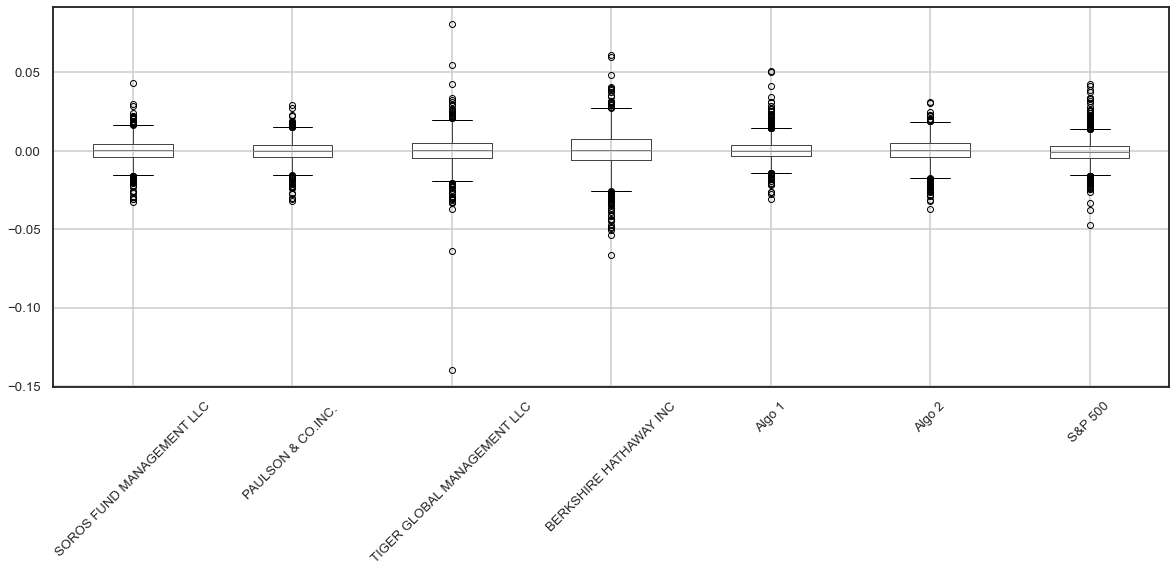

In [22]:
#DETERMINE RISK:::: BOXPLOT::: Since names are long here, they are adjusted at a 45 deg. angle to ensure readability.

combined_df.boxplot()
plt.xticks(rotation = 45)

In [23]:
#find standard deviation of each portfolio
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO.INC.              0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
S&P 500                        0.008587
dtype: float64

In [24]:
#Calculate the annualized standard deviation for 252 Trading Days
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.125348
PAULSON & CO.INC.              0.111527
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
Algo 1                         0.121006
Algo 2                         0.132413
S&P 500                        0.136313
dtype: float64

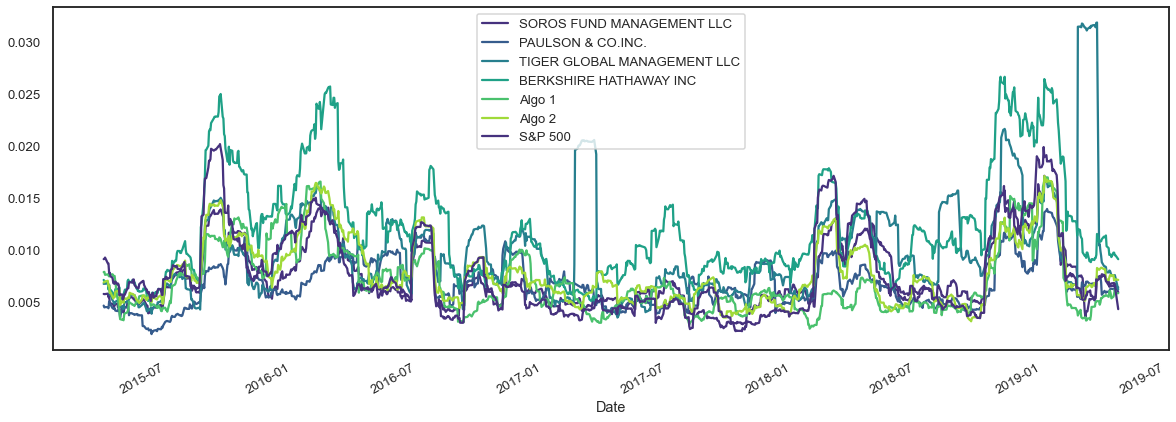

In [25]:
#ROLLING STATISTICS: CAlculate with a 21 day window
combined_df.rolling(window=21).std().plot()

In [26]:
#Construct a correlation table for the algorithmic, whale, and S&P 500 returns.

correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


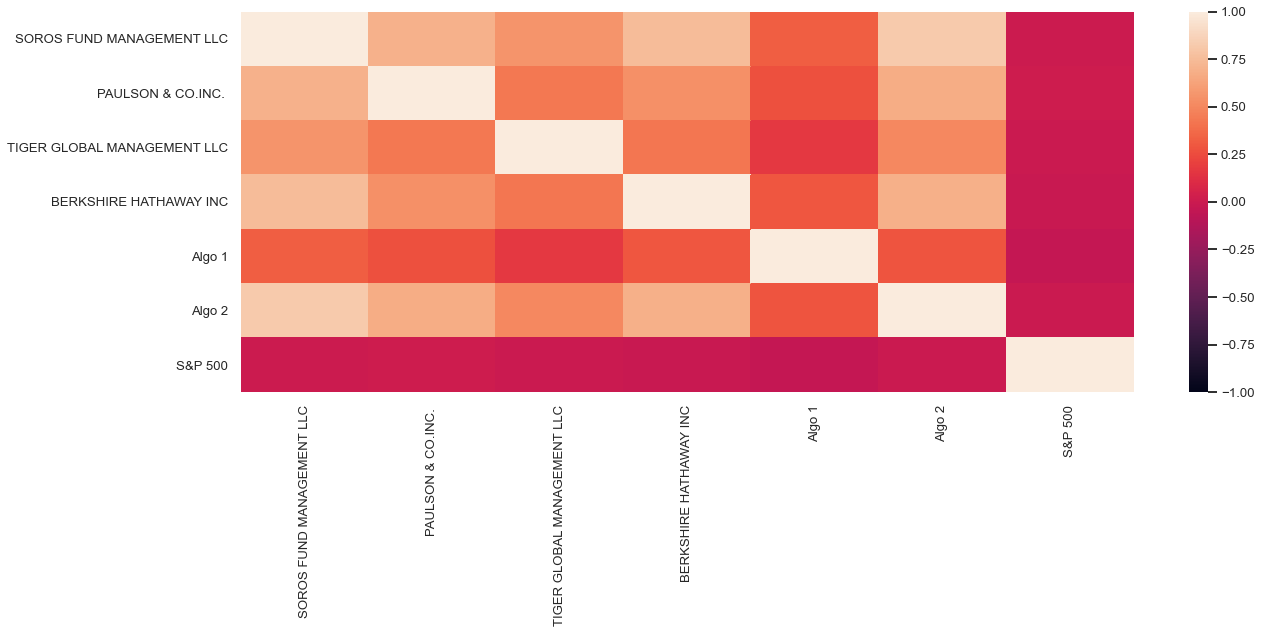

In [27]:
#Heatmaps show correlation the best. Create a heatmap!

sns.heatmap(correlation, vmin= -1, vmax=1)

In [28]:
#sharpe ratio calculation
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

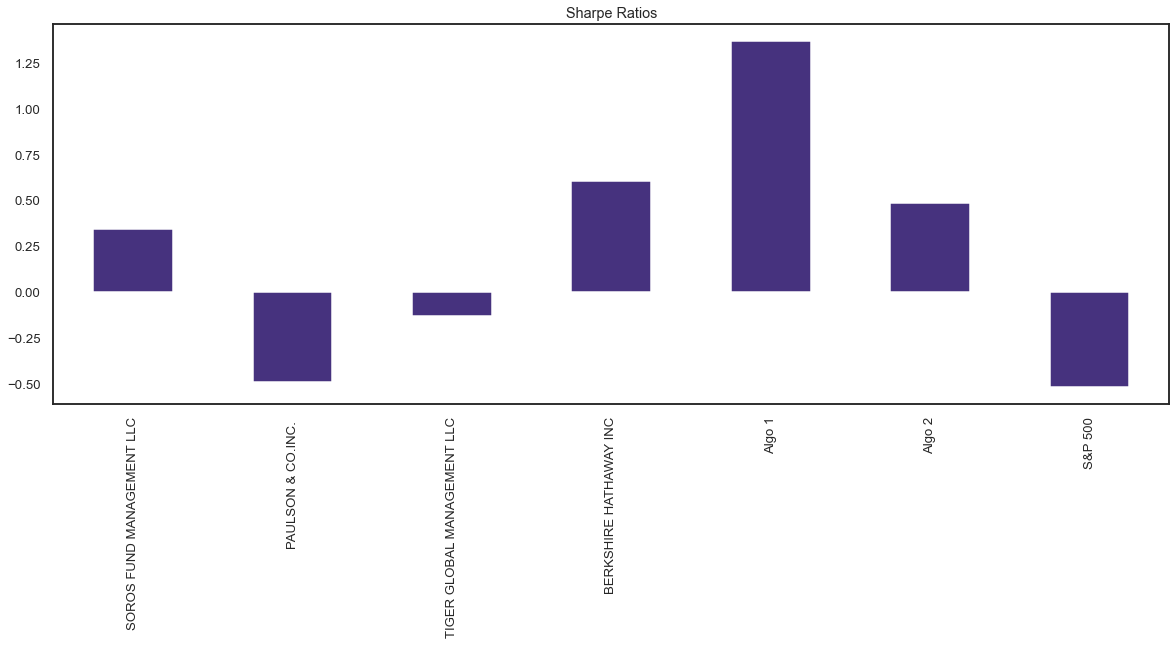

In [29]:
#Plot SHARPE RATIO AS BAR GRAPH
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [30]:
#Import CVS of Personal Porfolio
cgc_returns_csv = Path("Resources/cgc.csv")
cgc_returns = pd.read_csv(cgc_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)

ge_returns_csv = Path("Resources/ge.csv")
ge_returns = pd.read_csv(ge_returns_csv, index_col= "Date", infer_datetime_format=True, parse_dates=True)

# forgot to remove time stamp from original CSV, fixed datetime using code below.
stx_returns_csv = Path("Resources/stx.csv")
stx_returns = pd.read_csv(stx_returns_csv, index_col="Date", infer_datetime_format=True, parse_dates=True)
(cgc_returns.index).date
cgc_returns.index = cgc_returns.index.date

In [31]:
#Concat new DF from new CSV input
new_df = pd.concat([cgc_returns, ge_returns, stx_returns], axis = "columns", join = "inner")
new_df.columns= ["CGC", "GE", "STX"]
new_df.head()

,CGC,GE,STX
2019-01-02,28.92,8.05,39.08
2019-01-03,28.11,8.06,36.52
2019-01-04,28.23,8.23,38.14
2019-01-07,28.90,8.74,39.16
2019-01-08,29.64,8.56,39.14


In [32]:
#Calulate Daily Returns
daily_returns = new_df.pct_change()
daily_returns.sort_index()
daily_returns.sample(5)

,CGC,GE,STX
2019-01-08,0.025606,-0.020595,-0.000511
2019-08-05,-0.040660,-0.034000,-0.010906
2020-04-27,0.124439,0.027157,0.008225
2019-03-12,0.016301,-0.014141,-0.011310
2020-03-23,0.056636,-0.062883,0.001228


In [33]:
# Set weights for corresponding risk profile of stocks, use the `dot` function to sum the product each weight and the corresponding stock daily return
# CGC, GE, STX
weights = [0.33, 0.33, 0.33]
portfolio_returns = daily_returns.dot(weights)

portfolio_returns.head()

2019-01-02         NaN
2019-01-03   -0.030450
2019-01-04    0.023008
2019-01-07    0.037107
2019-01-08    0.001485
dtype: float64

In [34]:
#Create new DF by combining profiles and drop NAN values
combined_df ["custom_portfolio"] = portfolio_returns
combined_df.dropna(inplace = True)
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,custom_portfolio
Date,,,,,,,,
2019-01-03,-0.007848,-0.007403,-0.008478,-0.032053,0.015246,-0.011792,-0.033196,-0.030450
2019-01-04,0.029881,0.027032,0.033560,0.061341,0.017622,0.030509,-0.006962,0.023008
2019-01-07,0.009051,0.014475,0.014111,0.017185,0.014748,0.016942,-0.009602,0.037107
2019-01-08,0.010760,0.008050,0.001544,0.005851,0.010825,0.010479,-0.004081,0.001485
2019-01-09,0.008630,-0.000800,-0.000534,0.019788,0.000214,0.009658,-0.004498,0.050207


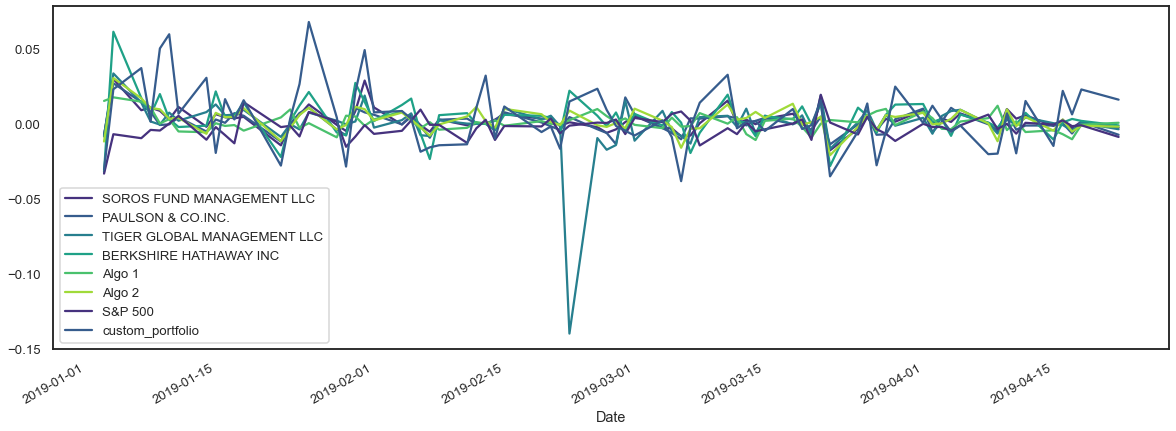

In [35]:
#plot data for combined df
combined_df.plot()

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2019-04-15                   1.186164            1.089443   
2019-04-16                   1.189366            1.089866   
2019-04-17                   1.185920            1.082817   
2019-04-18                   1.187637            1.084140   
2019-04-22                   1.184567            1.076191   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2019-04-15                     0.955770                1.282698  1.112587   
2019-04-16                     0.954976                1.283771  1.104860   
2019-04-17                     0.950765                1.287907  1.093479   
2019-04-18                     0.951318                1.290375  1.092836   
2019-04-22                     0.947855                1.288971  1.093575   

              Algo 2   S&P 500  

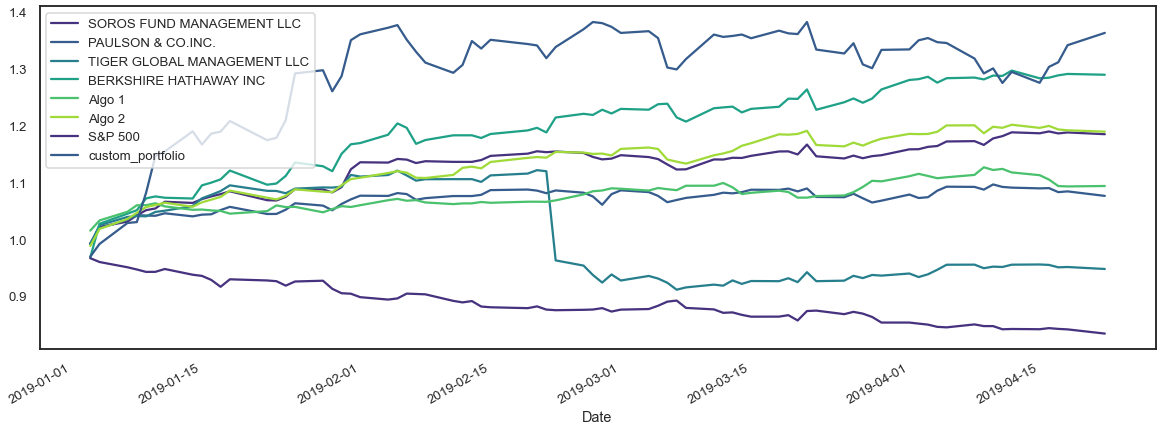

In [36]:
#Calculate Cumulative Returns
cumulative_returns = (1+ combined_df).cumprod()
cumulative_returns.plot()
print(cumulative_returns.tail())

(array([1, 2, 3, 4, 5, 6, 7, 8]), <a list of 8 Text major ticklabel objects>)

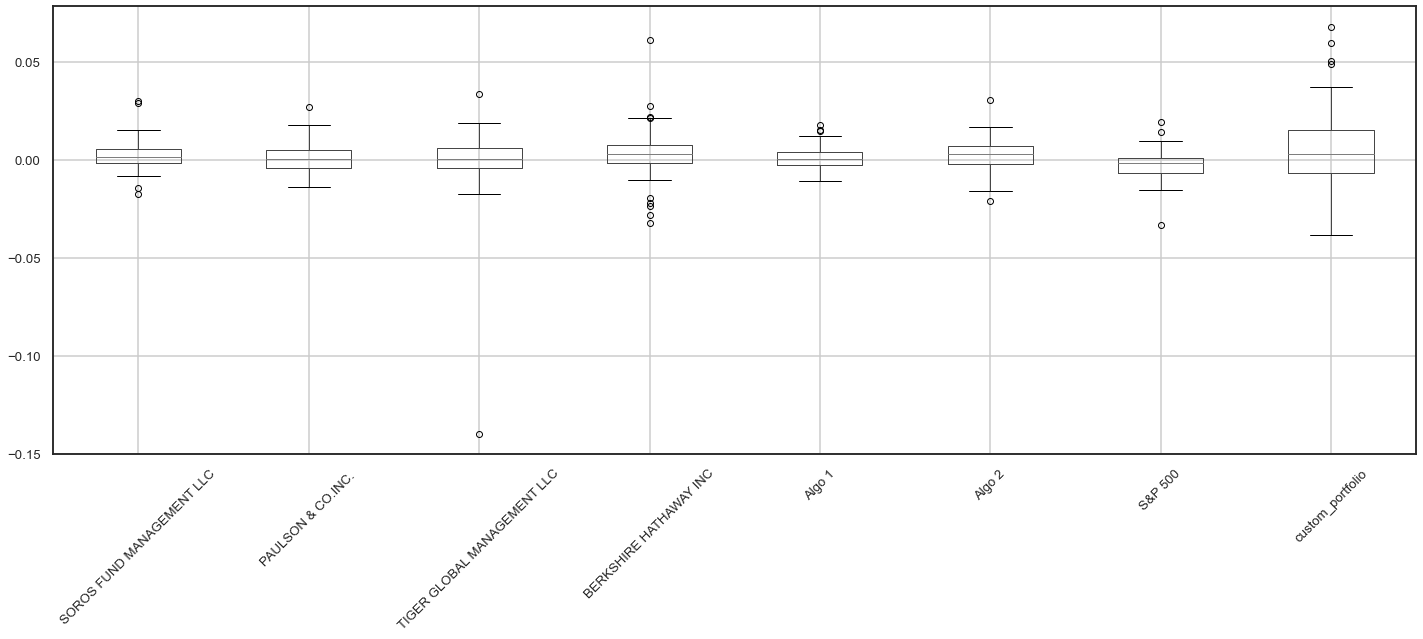

In [37]:
#DETERMINE RISK:::: by boxplotting -

combined_df.boxplot()
plt.tight_layout()
plt.xticks(rotation = 45)

In [38]:
#find standard deviation of each portfolio
combined_df.std()

SOROS FUND MANAGEMENT LLC      0.007500
PAULSON & CO.INC.              0.006999
TIGER GLOBAL MANAGEMENT LLC    0.018367
BERKSHIRE HATHAWAY INC         0.012905
Algo 1                         0.005752
Algo 2                         0.007662
S&P 500                        0.007221
custom_portfolio               0.020837
dtype: float64

In [39]:
#Calculate the annualized standard deviation for 252 trading days
annualized_variance = (combined_df.var()*252)
annualized_std = np.sqrt(annualized_variance)
annualized_std

SOROS FUND MANAGEMENT LLC      0.119063
PAULSON & CO.INC.              0.111101
TIGER GLOBAL MANAGEMENT LLC    0.291573
BERKSHIRE HATHAWAY INC         0.204862
Algo 1                         0.091311
Algo 2                         0.121633
S&P 500                        0.114623
custom_portfolio               0.330781
dtype: float64

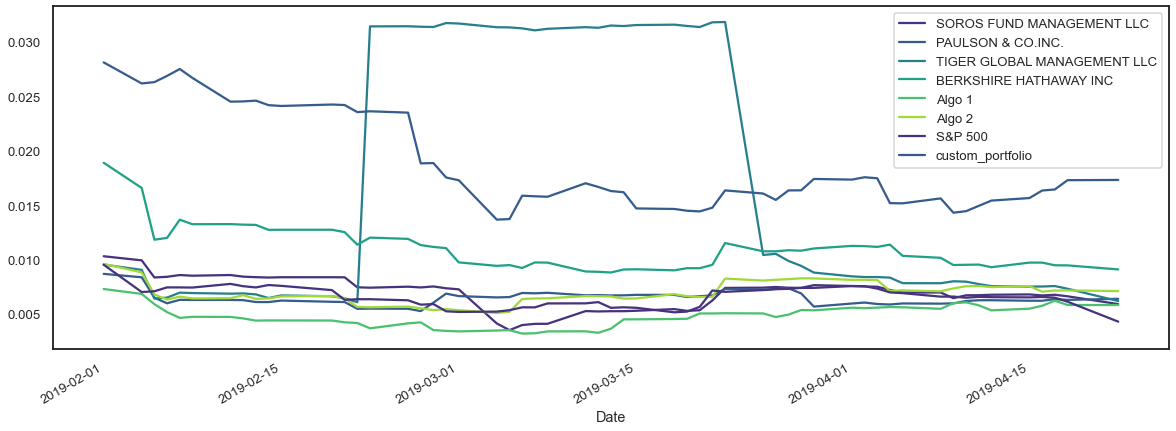

In [40]:
#ROLLING STATISTICS: Plot the std with the std of S&P500 (21days)
combined_df.rolling(window=21).std().plot()

In [41]:
#Construct a correlation table for the algorithmic, whale, S&P, & Custom Portfolio
correlation = combined_df.corr()
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,custom_portfolio
SOROS FUND MANAGEMENT LLC,1.000000,0.749619,0.354967,0.739745,0.086821,0.806153,0.129629,0.575253
PAULSON & CO.INC.,0.749619,1.000000,0.267402,0.617651,0.144765,0.737801,-0.006394,0.428085
TIGER GLOBAL MANAGEMENT LLC,0.354967,0.267402,1.000000,0.132445,0.019449,0.194660,0.012308,0.130667
BERKSHIRE HATHAWAY INC,0.739745,0.617651,0.132445,1.000000,0.161254,0.777624,0.166287,0.525196
Algo 1,0.086821,0.144765,0.019449,0.161254,1.000000,0.111214,-0.297747,-0.060863
Algo 2,0.806153,0.737801,0.194660,0.777624,0.111214,1.000000,0.057401,0.562195
S&P 500,0.129629,-0.006394,0.012308,0.166287,-0.297747,0.057401,1.000000,0.106256
custom_portfolio,0.575253,0.428085,0.130667,0.525196,-0.060863,0.562195,0.106256,1.000000


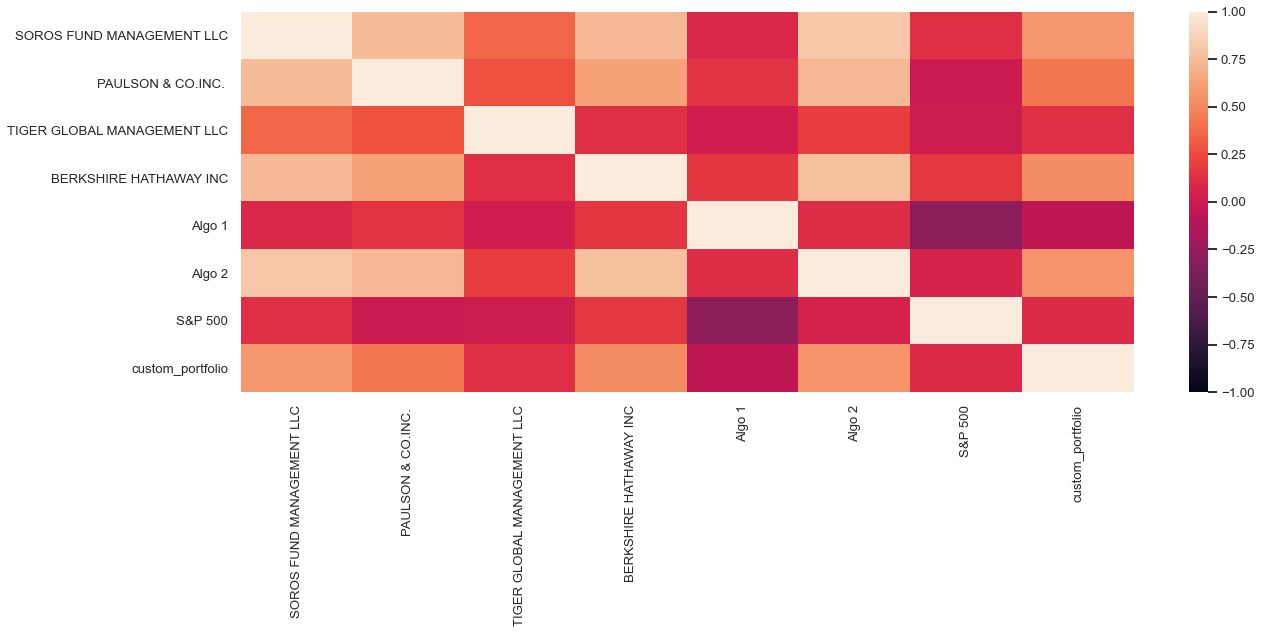

In [42]:
sns.heatmap(correlation, vmin= -1, vmax=1)

In [43]:
#sharpe ratio
sharpe_ratios = (combined_df.mean() * 252) / (combined_df.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      4.843614
PAULSON & CO.INC.              2.276355
TIGER GLOBAL MANAGEMENT LLC   -0.461606
BERKSHIRE HATHAWAY INC         4.270627
Algo 1                         3.338481
Algo 2                         4.849457
S&P 500                       -5.243403
custom_portfolio               3.309435
dtype: float64

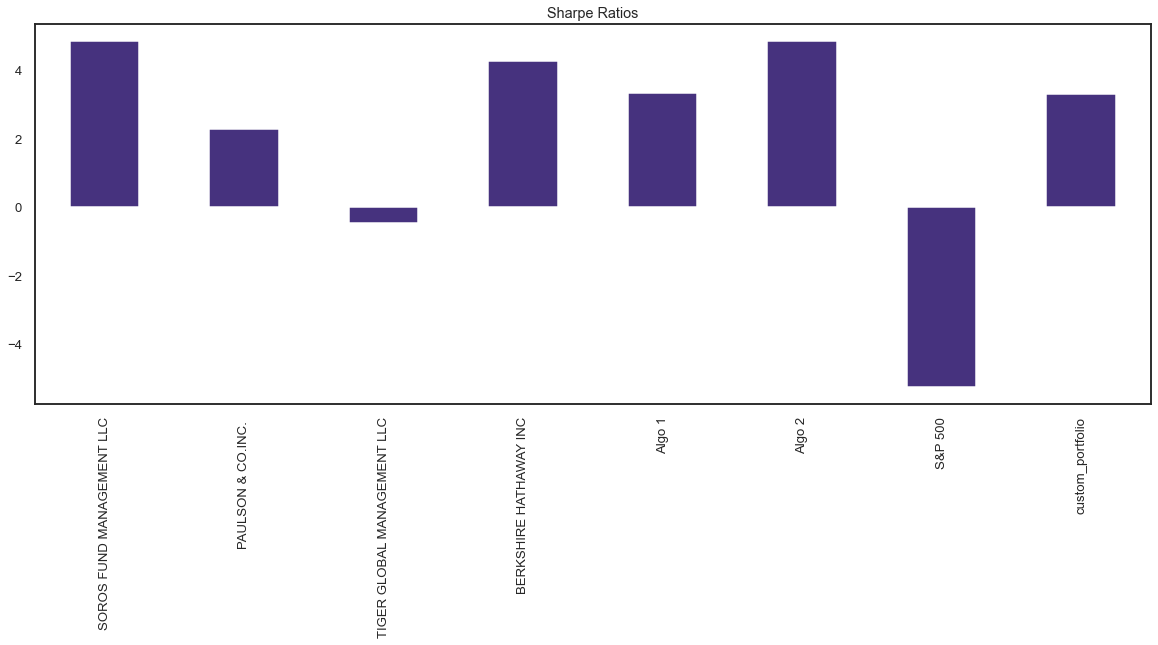

In [44]:
sharpe_ratios.plot(kind="bar", title="Sharpe Ratios")

In [45]:
#Calculate 30 day rolling covariance 
rolling_covariance = combined_df["custom_portfolio"].rolling(window=30).cov(combined_df['S&P 500'])
rolling_covariance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-15   -0.000015
2019-04-16   -0.000010
2019-04-17    0.000003
2019-04-18    0.000004
2019-04-22    0.000006
Length: 75, dtype: float64

In [46]:
#Caalculate 30 day rolling variance
rolling_variance = combined_df['S&P 500'].rolling(window=30).var()
rolling_variance

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-15    0.000043
2019-04-16    0.000041
2019-04-17    0.000038
2019-04-18    0.000037
2019-04-22    0.000034
Name: S&P 500, Length: 75, dtype: float64

In [47]:
#Calculate rolling beta
rolling_custom_beta =rolling_covariance/rolling_variance
rolling_custom_beta

Date
2019-01-03         NaN
2019-01-04         NaN
2019-01-07         NaN
2019-01-08         NaN
2019-01-09         NaN
                ...   
2019-04-15   -0.341131
2019-04-16   -0.234249
2019-04-17    0.084156
2019-04-18    0.115142
2019-04-22    0.188543
Length: 75, dtype: float64

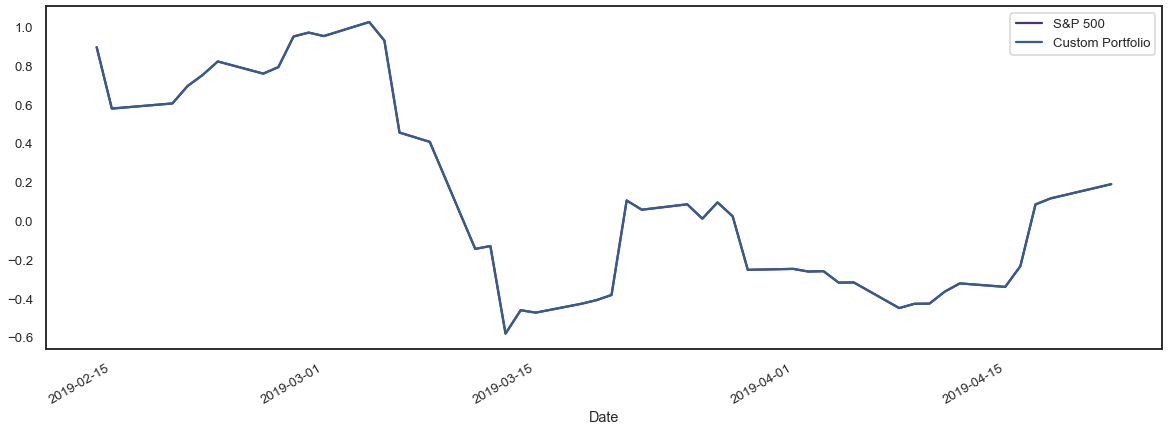

In [48]:
ax = rolling_custom_beta.plot()
rolling_custom_beta.plot(ax=ax)

# Set the legend of the figure
ax.legend (["S&P 500", "Custom Portfolio"])